In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend,find_peaks,savgol_filter
from glob import glob
import seaborn as sns
import scipy.signal as ss

In [83]:
dataPath = '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code'
pklFiles = glob(dataPath+'/*downscale*.pkl')
pklFiles.sort()
pklFiles

['/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230207_downscale_PC.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230210_downscale_PC.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230214_downscale_PC.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230215_downscale_PC.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230221_downscale_PC.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230222_downscale_PatcherBot.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230301_downscale_PatcherBot.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230302_downscale_PatcherBot.pkl',
 '/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/Jihong code/230307_downscale_PatcherBot.pkl',
 '/Volumes/genie/Jihong_GENIE_st

In [3]:
# df = pd.DataFrame()
# for f in pklFiles:
#     df_t = pd.read_pickle(f)
#     df = pd.concat([df,df_t],axis=0)
# df.shape

df = pd.read_pickle(pklFiles[-1])
df.index = np.arange(len(df))
df.shape
# df.columns

(947, 13)

In [4]:
def isNaN(A):
    return A!=A

In [59]:
pklFiles = ['/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/230309_downscale_PC.pkl']

In [60]:
df_plot = pd.DataFrame()
for f in pklFiles:
    print(f)
    DFF_1st = []
    Thre = []
    No_events = []
    df_t = pd.read_pickle(f)
    for i,r in df_t.iterrows():
        DFF_1st.append(r['DFF_hp_filt'][0])
        dFF_diff = np.diff(r['DFF_hp_filt'])
        Thre.append(np.max(dFF_diff)/np.std(dFF_diff[:50]))
        p,_ = ss.find_peaks(dFF_diff,height=5*np.std(dFF_diff[:50]))
        No_events.append(p.shape[0])
    df_t = df_t.assign(DFF_first=DFF_1st)
    df_t = df_t.assign(Thre=Thre)
    df_t = df_t.assign(No_events=No_events)
    print(df_t.shape)
    df_t = df_t.dropna()
    df_t = df_t[df_t['Thre']>7]
    print(df_t.shape)
    df_plot = pd.concat([df_plot,df_t],axis=0)


/Volumes/genie/Jihong_GENIE_stuff/iGluSnFR_spontaneous_activity/230309_downscale_PC.pkl
(947, 16)
(947, 16)


In [61]:
df_plot

Date      Plate Construct            FOV     ROI  ROI_no_pixels  \
0    230309  Plate_001   556.857  FOV_00001.tif   roi_2              2   
1    230309  Plate_001   556.857  FOV_00001.tif   roi_3              1   
2    230309  Plate_001   556.857  FOV_00001.tif   roi_4              2   
3    230309  Plate_001   556.857  FOV_00001.tif   roi_5              1   
4    230309  Plate_001   556.857  FOV_00001.tif   roi_6              1   
..      ...        ...       ...            ...     ...            ...   
942  230309  Plate_006   556.857  FOV_00006.tif  roi_40              1   
943  230309  Plate_006   556.857  FOV_00006.tif  roi_41              1   
944  230309  Plate_006   556.857  FOV_00006.tif  roi_42              3   
945  230309  Plate_006   556.857  FOV_00006.tif  roi_43              3   
946  230309  Plate_006   556.857  FOV_00006.tif  roi_45              2   

                                                   DFF  \
0    [16.945544554455445, 17.14108910891089, 17.066...   
1    [-0.04088785046728972, 0.07593457943925233, -0...   
2    [15.774082568807339, 15.88704128440367, 15.861...   
3    [-0.000625, 0.00375, 0.020625, -0.0175, 0.0131...   
4    [-0.0390625, -0.125, 0.050347222222222224, -0....   
..                                                 ...   
942  [0.012142857142857143, -0.003928571428571429, ...   
943  [-0.01429372197309417, 0.03139013452914798, -0...   
944  [13.581696428571428, 13.618080357142857, 13.52...   
945  [14.01693997524753, 14.1253094059406, 13.99767...   
946  [5.9182545731707314, 5.966463414634147, 5.9552...   

                                           DFF_hp_filt  \
0    [-0.043552501078311115, 0.15145902496511662, 0...   
1    [-0.01735066534942736, 0.09941776419610365, 0....   
2    [0.042489800494894925, 0.155003158171149, 0.12...   
3    [-0.048753191883855684, -0.04425762341512856, ...   
4    [-0.013170835616269874, -0.09931713840341314, ...   
..                                                 ...   
942  [0.046419040537170525, 0.03010167709634915, 0....   
943  [0.0031977005549901696, 0.048942367474762216, ...   
944  [0.029278485064773443, 0.06552878061803276, -0...   
945  [-0.009974292676374896, 0.09838778918167021, -...   
946  [0.0017702518208087548, 0.0497285481511629, 0....   

                                              Peak_idx  \
0    [19, 41, 49, 133, 151, 287, 293, 299, 317, 335...   
1                                         [1064, 5955]   
2    [7, 15, 31, 43, 61, 73, 93, 105, 117, 133, 148...   
3                                   [2753, 2761, 4085]   
4           [1990, 3964, 4066, 4071, 4991, 5001, 5992]   
..                                                 ...   
942  [3647, 3651, 3657, 3660, 3664, 3667, 3671, 367...   
943                                             [5093]   
944  [387, 1906, 1913, 1915, 3005, 3011, 3015, 3017...   
945                                 [3773, 3781, 3783]   
946                                              [184]   

                     Img_format          Objective Light_source Power  \
0    .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
1    .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
2    .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
3    .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
4    .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
..                          ...                ...          ...   ...   
942  .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
943  .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
944  .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
945  .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   
946  .tif converted from .dcimg  63x oil; N/A: 1.4         Cyan    7%   

     DFF_first       Thre  No_events  
0    -0.043553  16.522136          1  
1    -0.017351  11.669224          1  
2     0.042490  16.237105        

556.857


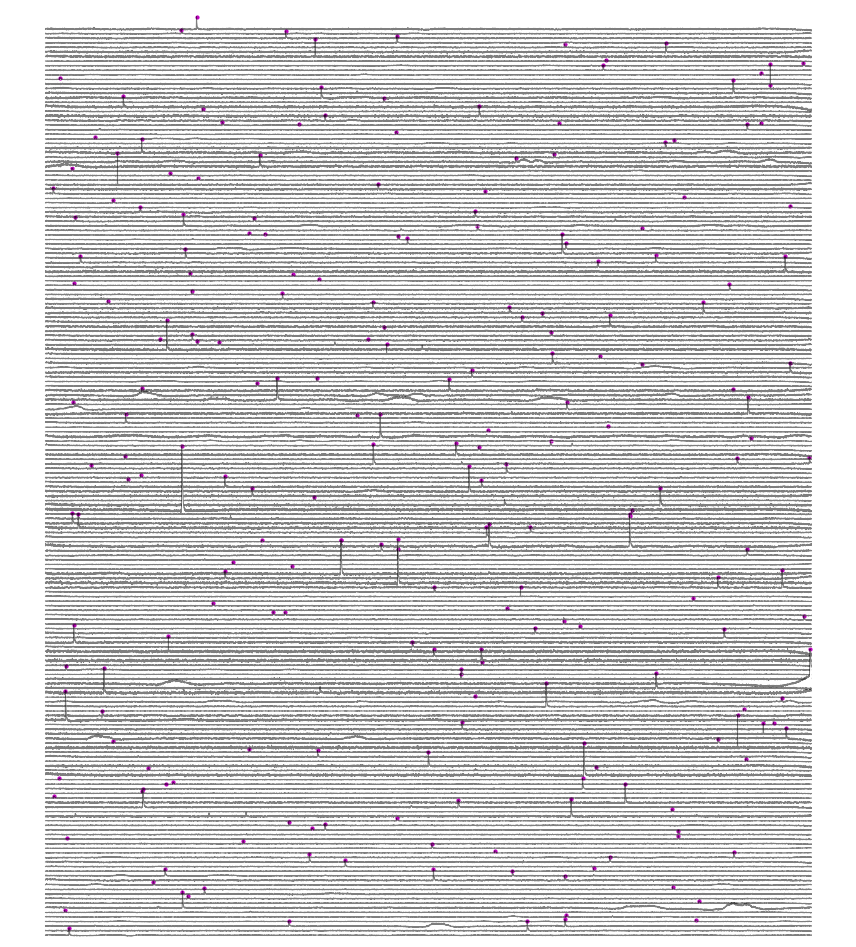

633.6391


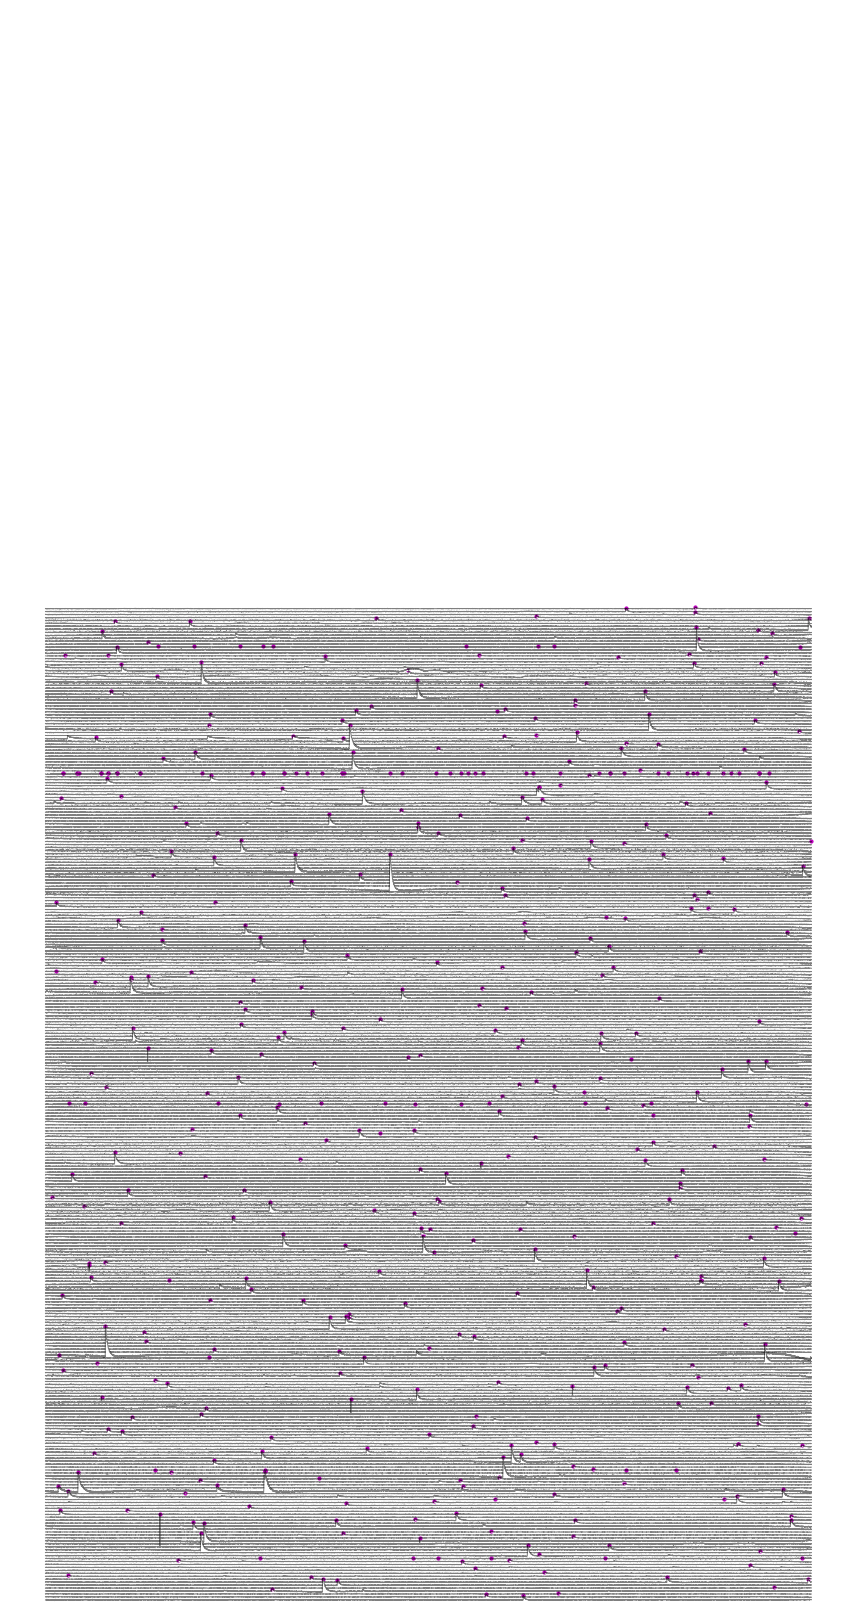

633.9530


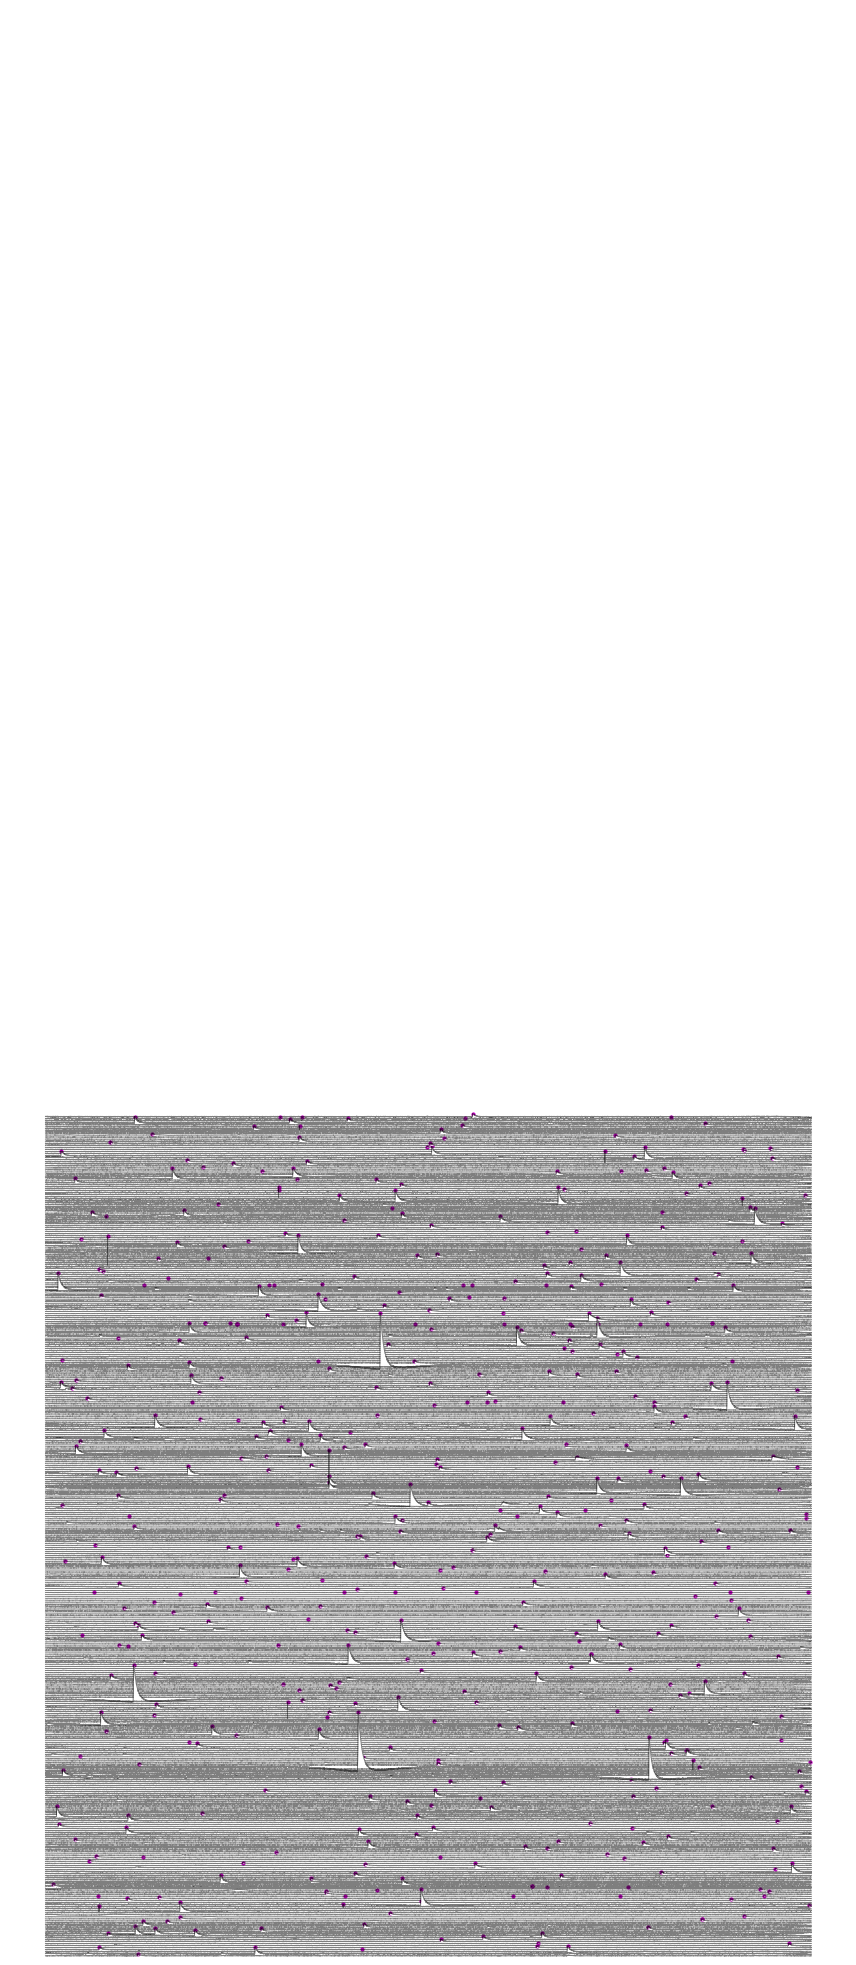

In [62]:
sns.reset_orig()
shift=0
for c in df_plot.Construct.unique():
    df_sel = df_plot[df_plot['Construct']==c]
    df_sel.index = np.arange(len(df_sel))
    plt.figure(figsize=[12,len(df_sel)/15])
    for i,r in df_sel.iterrows():
        if isNaN(r['DFF_hp_filt'][0]):
            continue
        if r['DFF_hp_filt'][0]-r['DFF_hp_filt'][-1]>2:
            continue
        dFF_diff = np.diff(r['DFF_hp_filt'])
        if np.max(dFF_diff)/np.std(dFF_diff[:50])<7:
            continue
        x = np.arange(r['DFF_hp_filt'].shape[0])
        plt.fill_between(x,r['DFF_hp_filt']-shift,-shift,zorder=shift+1,facecolor='w',edgecolor='w',lw=0,closed=True)
        plt.plot(x,r['DFF_hp_filt']-shift,zorder=shift+1,color='k',alpha=0.5,lw=1)

        p,_ = ss.find_peaks(dFF_diff,height=5*np.std(dFF_diff[:50]))
        for pk in p:
            y = r['DFF_hp_filt'][pk-10:pk+50]
            peak = np.argmin(np.abs(y-np.max(y)))
            idx = pk+peak-10
            plt.scatter(idx,r['DFF_hp_filt'][idx]-shift,color='m',s=10)
        plt.axis('off')
        shift+=1
    print(c)
    plt.ylim([-shift,5])
    plt.tight_layout()
    plt.show()

In [12]:
# sns.reset_orig()
# shift=0
# df_sel = df[df['Construct']=='633.8880']
# plt.figure(figsize=[12,len(df_sel)/100])
# df_sel = df[df['Construct']=='633.9147']
# plt.figure(figsize=[12,len(df_sel)/15])
# for i,r in df_sel.iterrows():
#     if isNaN(r['DFF_hp_filt'][0]):
#         continue
#     if r['DFF_hp_filt'][0]-r['DFF_hp_filt'][-1]>2:
#         continue
#     dFF_diff = np.diff(r['DFF_hp_filt'])
#     if np.max(dFF_diff)/np.std(dFF_diff[:50])<7:
#         continue
#     x = np.arange(r['DFF_hp_filt'].shape[0])
#     plt.fill_between(x,r['DFF_hp_filt']-shift,-shift,zorder=shift+1,facecolor='w',edgecolor='w',lw=0,closed=True)
#     plt.plot(x,r['DFF_hp_filt']-shift,zorder=shift+1,color='k',alpha=0.5,lw=1)
    
#     p,_ = ss.find_peaks(dFF_diff,height=5*np.std(dFF_diff[:50]))
#     for pk in p:
#         y = r['DFF_hp_filt'][pk-10:pk+50]
#         peak = np.argmin(np.abs(y-np.max(y)))
#         idx = pk+peak-10
# #         plt.scatter(idx,r['DFF_hp_filt'][idx]-shift,color='m',s=10)
#     plt.axis('off')
#     shift+=1
#     if shift>500:
#         break
# plt.ylim([-shift,5])
# plt.tight_layout()
# plt.show()

In [ ]:
# df.index = np.arange(len(df))
# df = df.dropna()
# df.shape
# df.columns
# df.Construct.unique()
# df.Date.unique()

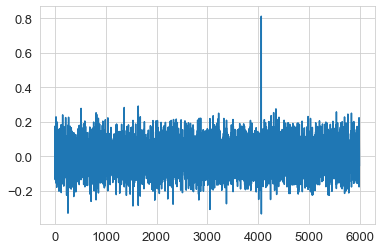

In [33]:
# df = df_plot
# df.index = np.arange(len(df))
# df.head()
y = df.loc[4,'DFF_hp_filt']
z = np.diff(y)
plt.plot(z)

In [64]:
Week = []
C = []
DFF_peak = []
HR = []
HD = []
Event_trace = []
DFF_peak_fit = []
Tau_on = []
Tau_off = []

In [65]:
df = df_plot
for i in range(len(df)):
    if i%1000==0:
        print(i)
    y = df.loc[i,'DFF_hp_filt']
    if isNaN(y[0]):
        continue
    y_diff = np.diff(y)
    p,_ = find_peaks(y_diff,height=5*np.std(y_diff[:50]))
    if p.shape[0]!=0:
        for pk in p:
            if df.loc[i,'Date'] in ['230207','230210']:
                Week.append('week_1')
            elif df.loc[i,'Date'] in ['230214','230215']:
                Week.append('week_2')
            elif df.loc[i,'Date'] in ['230221','230222']:
                Week.append('week_3')
            elif df.loc[i,'Date'] in ['230301','230302']:
                Week.append('week_4')
            elif df.loc[i,'Date'] in ['230307','230308','230309']:
                Week.append('week_5')
            C.append(df.loc[i,'Construct'])
            try:
                DFF_peak.append(np.max(y[pk-10:pk+100]))
                Event_trace.append(y[pk-10:pk+100])
            
            except:
                DFF_peak.append(np.nan) # event occured within first 10 frames
                Event_trace.append(np.nan)
            
            try:
                y1 = y[pk-10:pk+100]
                y1 = y1-y1[0]
                peak = np.argmin(np.abs(y1-np.max(y1)))
                d_trace = y1[peak:]
                x = np.arange(d_trace.shape[0])
                hd = np.argmin(np.abs(d_trace-np.max(y1)/2))
                HD.append(hd*10)
            except:        
                HD.append(np.nan)
            try:
                y1 = np.flip(y1)
                peak = np.argmin(np.abs(y1-np.max(y1)))
                r_trace = y1[peak:]
                x = np.arange(r_trace.shape[0])
                hr = np.argmin(np.abs(r_trace-np.max(r_trace)/2))
                HR.append(hr*10)
                            
            except:        
                HR.append(np.nan)
                
            try:
                y1 = y[pk:pk+70]
                y1 = y1-y1[0]
                x1 = np.arange(y1.shape[0])
                popt, pcov = curve_fit(alpha_fit,x1,y1,p0=(1,15),maxfev=2000)
                y_fit = alpha_fit(x1,popt[0],popt[1])
                if np.std(y_fit)!=0:
                    DFF_peak_fit.append(np.max(y_fit))
                    Tau_on.append(popt[0]*10)
                    Tau_off.append(popt[1]*10)
                else:
                    DFF_peak_fit.append(np.nan)
                    Tau_on.append(np.nan)
                    Tau_off.append(np.nan)
            except:
                DFF_peak_fit.append(np.nan)
                Tau_on.append(np.nan)
                Tau_off.append(np.nan)
#     if i>100:
#         break

0


In [66]:
# pk
# DFF_peak
# d_trace
# peak
# plt.plot(y[pk-10:pk+100])
# plt.plot(d_trace)
# hd
# for i in range(len(HD)):
#     print(i,HD[i])
# plt.plot(Event_trace[4])
# print(HD[4])
# df
# isNaN(np.nan)

In [67]:
df_plot = pd.DataFrame()
df_plot['Week'] = Week
df_plot['Construct'] = C
df_plot['Mini amplitude'] = DFF_peak
df_plot['Half rise time (ms)'] = HR
df_plot['Half decay time (ms)'] = HD
df_plot['\u0394F/F0 peak'] = DFF_peak_fit
df_plot['Tau on (ms)'] = Tau_on
df_plot['Tau off (ms)'] = Tau_off

In [68]:
df_plot.shape

(1244, 8)

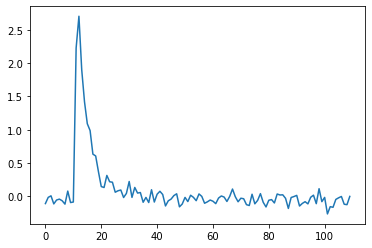

In [71]:
# df_plot.dropna().shape
# df_plot.head()
plt.plot(Event_trace[0])

In [72]:
from scipy.optimize import curve_fit
def alpha_fit(t,t_on,t_off):
    y = (1-1/np.exp((t)/t_on)) / np.exp((t)/t_off)
    return y

/var/folders/87/trl8ql4s7vj6fkdtrrkcwx6s0zb2d2/T/ipykernel_43743/3340490910.py:3: RuntimeWarning: overflow encountered in exp
  y = (1-1/np.exp((t)/t_on)) / np.exp((t)/t_off)
/Users/zhengj10/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


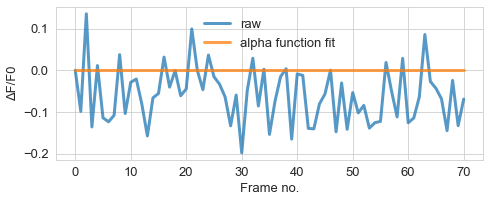

In [73]:
idx = 50
plt.figure(figsize=[7,3])
plt.rc('font',size=13)
sns.set_style('whitegrid')
z = df.loc[idx,'DFF_hp_filt']
y = df.loc[idx,'DFF_hp_filt']
x = np.arange(len(y))
# plt.plot(x,y)
p,_ = find_peaks(np.diff(y),height=0.2)
x1 = x[p[0]-1:p[0]+70]
x1 = x1-x1[0]
y1 = y[p[0]-1:p[0]+70]
y1 = y1-y1[0]
plt.plot(x1,y1,lw=3,alpha=0.75,label='raw')
# plt.scatter(p+3,y[p+3],color='m')
popt, pcov = curve_fit(alpha_fit,x1,y1,p0=(1,10),maxfev=2000)
# plt.plot(x1,(1-1/np.exp((x1)/popt[0]))/np.exp((x1)/popt[1]))
plt.plot(x1,alpha_fit(x1,popt[0],popt[1]),lw=3,alpha=0.75,label='alpha function fit')
plt.xlabel('Frame no.')
plt.ylabel('\u0394F/F0')
plt.legend(frameon=False)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230314/mini/alpha_fit.svg',format='svg')
plt.show()

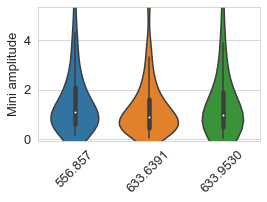

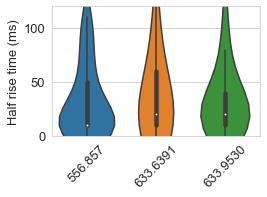

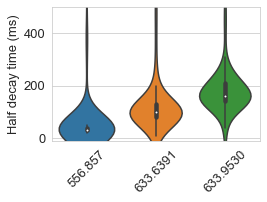

In [75]:
# df_plot['Week'] = Week
# df_plot['Construct'] = C
# df_plot['Mini amplitude'] = DFF_peak
# df_plot['Half rise time (ms)'] = HR
# df_plot['Half decay time (ms)'] = HD
# df_plot['\u0394F/F0 peak'] = DFF_peak_fit
# df_plot['Tau on (ms)'] = Tau_on
# df_plot['Tau off (ms)'] = Tau_off

# df_plot = df_plot.sort_values(by='Mini amplitude',ascending=True)
sns.set_style('whitegrid')
idx = 31
# df_p = df_plot[(df_plot['Construct'].isin(df_plot['Construct'].unique()[idx:idx+31]))]
df_p = df_plot
# df_p = df_p.dropna()
param_dict = {'Norm. \u0394F/F0 peak':'Norm_dFF_peak','Norm_tau_on':'Norm_tau_on','Norm_tau_off':'Norm_tau_off'}
for param in ['Mini amplitude','Half rise time (ms)','Half decay time (ms)']:
# for param in ['Norm. peak DFF','Half rise time (ms)','Half decay time (ms)']:
    plt.figure(figsize=[13*(df_p['Construct'].unique().shape[0])/10,3])
    plt.rc('font',size=13)
    ax = plt.subplot(111)
    df_p.dropna(subset=[param],inplace=True)
    sns.violinplot(x='Construct',y=param,data=df_p,ax=ax)
    
    y_min = np.quantile(df_p[param],0.01)*-1
    if param == 'Norm. \u0394F/F0 peak':
        y_max = np.quantile(df_p[param],0.99)
    else:
#         y_max = np.quantile(df_p[param],0.5) # idx = 0
        y_max = np.quantile(df_p[param],0.95) # idx = 31
        
    ax.set_ylim([y_min,y_max])
# 
    ax.set_xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
#     plt.savefig('/Users/zhengj10/Desktop/230314/mini/%s_%s.svg' %(param_dict[param],idx))
    plt.show()
    plt.close()

In [27]:
df_p

Week Construct  Mini amplitude  Half rise time (ms)  \
0       week_5   556.857        0.273527                130.0   
1       week_5   556.857        0.273527                100.0   
2       week_5   556.857        0.273527                 40.0   
3       week_5   556.857        0.273527                  0.0   
4       week_5   556.857        0.271710                 40.0   
...        ...       ...             ...                  ...   
177982  week_5   556.857        2.121153                 10.0   
177983  week_5   556.857        0.164046                 60.0   
177984  week_5   556.857        0.188094                 40.0   
177985  week_5   556.857        0.188094                 30.0   
177986  week_5   556.857        1.516582                 10.0   

        Half decay time (ms)  ΔF/F0 peak  Tau on (ms)  Tau off (ms)  
0                      730.0         NaN          NaN           NaN  
1                      720.0         NaN          NaN           NaN  
2                      540.0         NaN          NaN           NaN  
3                      180.0         NaN          NaN           NaN  
4                      420.0         NaN          NaN           NaN  
...                      ...         ...          ...           ...  
177982                  40.0         NaN          NaN           NaN  
177983                 720.0         NaN          NaN           NaN  
177984                 200.0         NaN          NaN           NaN  
177985                 980.0         NaN          NaN           NaN  
177986                  30.0         NaN          NaN           NaN  

[177747 rows x 8 columns]

In [ ]:
# curve_fit?
# popt[1]
# np.max(alpha_fit(x1,popt[0],popt[1]))
# alpha_fit(x1,popt[0],popt[1])[0]
df_plot

In [ ]:
ctr_median = {}

plt.figure(figsize=[4,3])
plt.rc('font',size=13)
df_plot_ctr = df_plot[df_plot['Construct']=='556.857']
for w in df_plot_ctr.Week.unique():
    ctr_median[w] = {}
    ctr_median[w]['\u0394F/F0 peak'] = df_plot_ctr[df_plot_ctr['Week']==w]['\u0394F/F0 peak'].median()
    ctr_median[w]['Tau on (ms)'] = df_plot_ctr[df_plot_ctr['Week']==w]['Tau on (ms)'].median()
    ctr_median[w]['Tau off (ms)'] = df_plot_ctr[df_plot_ctr['Week']==w]['Tau off (ms)'].median()
ax = plt.subplot(111)
sns.violinplot(x='Week',y='\u0394F/F0 peak',data=df_plot_ctr,ax=ax)
ax.set_xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('/Users/zhengj10/Desktop/230314/mini/control.svg',format='svg')
plt.show()

In [ ]:
ctr_median
# Norm_dFF_peak_fit = []
Norm_tau_on = []
Norm_tau_off = []
for i,r in df_plot.iterrows():
#     Norm_dFF_peak_fit.append(r['\u0394F/F0 peak']/ctr_median[r['Week']])
    Norm_tau_on.append(r['Tau on (ms)']/ctr_median[r['Week']]['Tau on (ms)'])
    Norm_tau_off.append(r['Tau off (ms)']/ctr_median[r['Week']]['Tau off (ms)'])

In [ ]:
# df_plot['Norm. \u0394F/F0 peak'] = Norm_dFF_peak
df_plot = df_plot.assign(Norm_tau_on=Norm_tau_on)
df_plot = df_plot.assign(Norm_tau_off=Norm_tau_off)

In [ ]:
df_plot.columns

In [ ]:
sns.set_style('whitegrid')
idx = 31
df_p = df_plot[(df_plot['Construct']!='556.857')&(df_plot['Construct'].isin(df_plot['Construct'].unique()[idx:idx+31]))]
df_p = df_p.dropna()
param_dict = {'Norm. \u0394F/F0 peak':'Norm_dFF_peak','Norm_tau_on':'Norm_tau_on','Norm_tau_off':'Norm_tau_off'}
for param in ['Norm. \u0394F/F0 peak','Norm_tau_on','Norm_tau_off']:
# for param in ['Norm. peak DFF','Half rise time (ms)','Half decay time (ms)']:
    plt.figure(figsize=[13*(df_p['Construct'].unique().shape[0])/31,3])
    plt.rc('font',size=13)
    ax = plt.subplot(111)
    df_p.dropna(subset=[param],inplace=True)
    sns.violinplot(x='Construct',y=param,data=df_p,ax=ax)
    
    y_min = np.quantile(df_p[param],0.01)*-1
    if param == 'Norm. \u0394F/F0 peak':
        y_max = np.quantile(df_p[param],0.99)
    else:
#         y_max = np.quantile(df_p[param],0.5) # idx = 0
        y_max = np.quantile(df_p[param],0.9) # idx = 31
        
    ax.set_ylim([y_min,y_max])

    ax.set_xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
#     plt.savefig('/Users/zhengj10/Desktop/230314/mini/%s_%s.svg' %(param_dict[param],idx))
    plt.show()
    plt.close()

In [ ]:
df_p = df[df['Construct']=='633.6796']
df_p = df_p.dropna()
sns.reset_orig()
plt.figure(figsize=[13,len(df_p)/5])
df_p.index = np.arange(len(df_p))
for i,r in df_p.iterrows():
    x = np.arange(6000)
    plt.plot(x,r['DFF_hp_filt']-i,color='k',zorder=i+1)
    plt.fill_between(x,r['DFF_hp_filt']-i,-i,color='k',zorder=i+1)
plt.axis('off')
plt.tight_layout()
plt.show()

df_p_ctr = df[df['Construct']=='556.857']
df_p_ctr = df_p_ctr[df_p_ctr['Date'].isin(['230307','230308'])]
df_p_ctr = df_p_ctr.dropna()
sns.reset_orig()
plt.figure(figsize=[13,len(df_p)/5])
df_p_ctr.index = np.arange(len(df_p_ctr))
for i,r in df_p_ctr.iterrows():
    x = np.arange(6000)
    plt.plot(x,r['DFF_hp_filt']-i,color='k',zorder=i+1)
    plt.fill_between(x,r['DFF_hp_filt']-i,-i,color='k',zorder=i+1)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Unnormalized data

In [ ]:
df_plot.columns

In [ ]:
sns.set_style('whitegrid')
idx = 0
df_plot = df_plot.sort_values(by='Construct',ascending=True)
df_p = df_plot
df_p = df_p.dropna()
param_dict = {'Mini amplitude':'dFF_peak','Tau on (ms)':'Tau on (ms)','Tau off (ms)':'Tau off (ms)',
             'Half rise time (ms)':'Half rise time (ms)','Half decay time (ms)':'Half decay time (ms)'}
# for param in ['Mini amplitude','Tau on (ms)','Tau off (ms)']:
for param in ['Mini amplitude','Half rise time (ms)','Half decay time (ms)']:
    plt.figure(figsize=[13*(df_p['Construct'].unique().shape[0])/31,3])
    plt.rc('font',size=13)
    ax = plt.subplot(111)
    sns.violinplot(x='Construct',y=param,data=df_p,ax=ax)
    
    y_min = np.quantile(df_p[param],0.01)*-1
    if param == 'Mini amplitude':
        y_max = np.quantile(df_p[param],0.99)
    else:
#         y_max = np.quantile(df_p[param],0.5) # idx = 0
#         y_max = np.quantile(df_p[param],0.9) # idx = 31
        y_max = 100
        
    ax.set_ylim([y_min,y_max])

    ax.set_xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('/Users/zhengj10/Desktop/230321/mini/%s.svg' %param_dict[param])
    plt.show()
    plt.close()

In [ ]:
df_plot.sort_values(by='Construct',ascending=True).Construct.unique()

In [ ]:
['Week', 'Construct', 'Mini amplitude', 'Half rise time (ms)',
       'Half decay time (ms)', 'ΔF/F0 peak', 'Tau on (ms)', 'Tau off (ms)',
       'Norm. ΔF/F0 peak', 'Norm_tau_on', 'Norm_tau_off']

In [ ]:
# df_p2 = df[df['Construct']=='556.857'] # 8376, 8880, 9147
# df_p2 = df[df['Construct']=='633.8376']
# df_p2 = df[df['Construct']=='633.9147']
# df_p2 = df[df['Construct']=='633.9163']
# df_p2 = df[df['Construct']=='633.6787']
# df_p2 = df[df['Construct']=='633.1596']
df_p2 = df[df['Construct']=='633.135']
df_p2.index = np.arange(len(df_p2))
df_p2.shape

In [ ]:
plt.figure(figsize=[13,df_p2.shape[0]/15])
shift = 0
for i,r in df_p2.iterrows():
    if isNaN(r['DFF_hp_filt'][0]):
        continue
    x = np.arange(r['DFF_hp_filt'].shape[0])
    plt.plot(x,r['DFF_hp_filt']-shift,color='k',zorder=shift,alpha=0.75)
    plt.fill_between(x,r['DFF_hp_filt']-shift,-1*shift,zorder=shift,color='w',alpha=0.75)
#     plt.axis('off')
    shift+=1
plt.tight_layout()
plt.show()